Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

- Recommendation engines: group products to personalize the user experience
- Search engines: group news topics and search results
- Market segmentation: group customers based on geography, demography, and behaviors
- Image segmentation: medical imaging or road scene segmentation on self-driving cars
- Text clustering: group similar texts together based on word usage

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

- How many groups do we choose?
- How do we define similarity?

k-means is the most popular and well-known clustering algorithm, and it tries to address these two questions.

- The “k” refers to the number of clusters (groups) we expect to find in a dataset.
- The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

It is an iterative approach:

1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Calculate new centroids based on the above-assigned data samples.
4. Repeat Steps 2 and 3 until convergence.

Convergence occurs when points don’t move between clusters and centroids stabilize. This iterative process of updating clusters and centroids is called training.

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster. This is called inference.

In [136]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.data)
# Each row is a plant



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Each row above is a plant

The iris dataset comes with target values. Real life datasets won't have target values. Use these for practice

In [137]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Look at one single row of data and the corresponding target.

In [138]:
print(iris.data[0, :], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [139]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Visualise before K-Means

With Matplotlib, we can create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. petal length). Of course there are four different features that we could plot, but it’s much easier to visualize only two dimensions.

### 1. Place k random centroids for the initial clusters.

[[7.60234165 3.50820422]
 [7.08952404 2.38798517]
 [6.81500356 4.110631  ]]


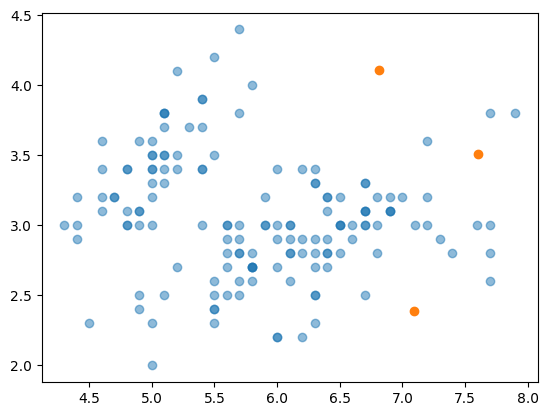

In [140]:
import matplotlib.pyplot as plt
import numpy as np

samples = iris.data

x = samples[:,0] #[all_rows , column_0]
y = samples[:,1] #[all_rows , column_1]

# Number of clusters
k = 3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)

# Create an array named centroids and use the zip() function to add centroids_x and centroids_y to it.
# Create y coordinates of k random centroids
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)
# Add the centroids to the scatter
plt.scatter(centroids_x, centroids_y)
plt.show()

Remember that you’re only looking at two out of four dimensions of the data set. Based on that it might not look like there are three distinct clusters, but since we are missing two dimensions this plot won’t tell the whole story.

### 2. Assign data samples to the nearest centroid.

In [141]:
def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample

def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# Assign the nearest centroid to each sample

for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Print labels

print(labels)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 0. 2. 1. 1. 1. 1. 2. 1. 0. 1. 1.
 0. 1. 0. 1. 2. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 0.
 2. 1. 1. 1. 2. 1.]


### Didnt bother with 3 and 4. Skipped to scikit. Codeacademy was buggy

In [142]:
from sklearn.cluster import KMeans

# For Step 1, use the KMeans() method to build a model that finds k clusters. 
# To specify the number of clusters (k), use the n_clusters keyword argument:
model = KMeans(n_clusters = 3)

# For Steps 2 and 3, use the .fit() method to compute k-means clustering:
model.fit(samples)

# After k-means, we can now predict the closest cluster each sample in X belongs to. 
# Use the .predict() method to compute cluster centers and predict cluster index for each sample:
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### New data

Since you have created a model that computed k-means clustering, you can now feed new data samples into it and obtain the cluster labels using the .predict() method.

In [143]:
# Store the new Iris measurements
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# Predict labels for the new_samples
new_labels = model.predict(new_samples)

print(new_labels)

# see the names of the predicted classes instead of just the numerical targets
new_names = [iris.target_names[label] for label in new_labels]

print(new_names)

[1 0 0]
['versicolor', 'setosa', 'setosa']


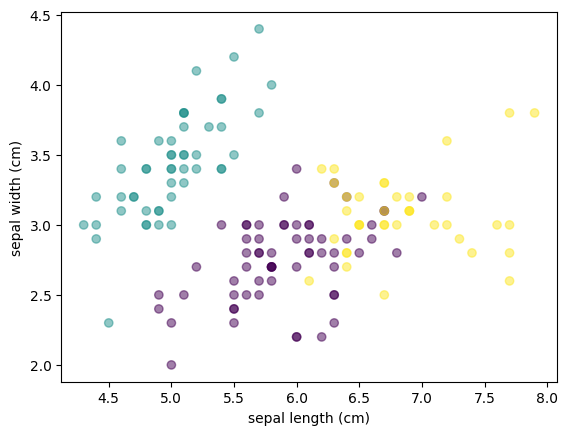

In [144]:
# Make a scatter plot of x and y and using labels to define the colors
x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

## Evaluation



In [145]:
# Import the species target data
species = [iris.target_names[t] for t in list(target)]

# Create a dataframe that compares labelled data vs species target data
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

# Perform a cross tabulation using crosstab to check if correct
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

NameError: name 'target' is not defined

### Number of clusters

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured by inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done.

29.990426406926403


c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

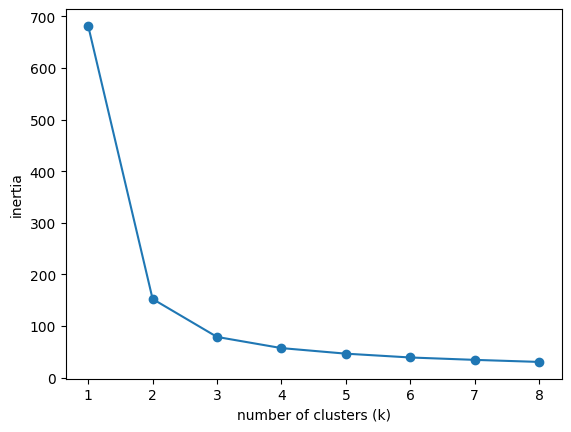

In [ ]:
print(model.inertia_)

num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

plt.show()

## Try it myself

Note that if you download the data like this, the data is already split up into a training and a test set, indicated by the extensions .tra and .tes. You’ll need to load in both files.

c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 ... 4 4 2]


c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

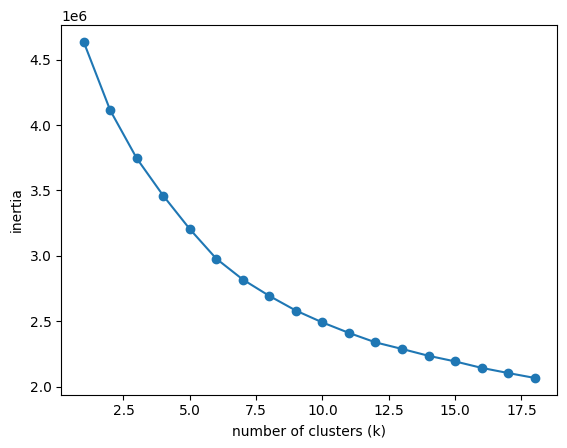

In [152]:
import pandas as pd

digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)
digits_test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes", header=None)

model = KMeans(n_clusters = 5)

model.fit(digits)

labels = model.predict(digits)
print(labels)

num_clusters = list(range(1, 19))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(digits)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

plt.show()